## **AIR QUALITY INDEX PREDICTION**

Importing the required libraries for **DATA PREPROCESSING**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the ***AIR QUALITY INDEX DATASET*** using pandas library

In [2]:
df = pd.read_csv("Data/Real-Data/Real_Combine.csv")
df.head()

T    TM    Tm  SLP       H    VV    V   VM  PM 2.5
0  2.0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3     9.4
1  3.0   7.8  12.7  4.4  1018.5  87.0  0.6  4.4    11.1
2  7.0   6.7  13.4  2.4  1019.4  82.0  0.6  4.8    11.1
3  8.0   8.6  15.5  3.3  1018.7  72.0  0.8  8.1    20.6
4  9.0  12.4  20.9  4.4  1017.3  61.0  1.3  8.7    22.2

## ***Exploratory Data Analysis***

Checking for null values in the dataset.

In [3]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

From the above, output we infer that there is only **one missing value** in the `PM 2.5` column which is the **Dependent Variable.**

**About the Data:**

In [4]:
print("-----------------------------------------------------")
print("Is the basic Info of the Air Quality Index Dataset".format(df.info()))
print("-----------------------------------------------------")
print("The shape of the dataset is {} (rows and columns)".format(df.shape))
print("-----------------------------------------------------")
print("The Number of Unique values present in the dataset is: ")
print(df.nunique())

-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       731 non-null    float64
 1   TM      731 non-null    float64
 2   Tm      731 non-null    float64
 3   SLP     731 non-null    float64
 4   H       731 non-null    float64
 5   VV      731 non-null    float64
 6   V       731 non-null    float64
 7   VM      731 non-null    float64
 8   PM 2.5  730 non-null    float64
dtypes: float64(9)
memory usage: 51.5 KB
Is the basic Info of the Air Quality Index Dataset
-----------------------------------------------------
The shape of the dataset is (731, 9) (rows and columns)
-----------------------------------------------------
The Number of Unique values present in the dataset is: 
T         238
TM        243
Tm        239
SLP       224
H         254
VV         77
V          23
VM         94
PM 2.5     

From the above results, we infer that there are `731 rows and 9 columns` which are of `float64` datatypes.
Also, we find that all the 9 variables are `CONTINOUS`

**Drop the missing values & duplicates**

In [5]:
df = df.drop_duplicates()
df = df.dropna()

***DESCRIPTIVE STATISTICS***

In [6]:
des_stat  = df.describe()
des_stat.loc['range'] = des_stat.loc['max'] - des_stat.loc['min']
des_stat.loc['variance'] = df.var()

fields = ['count','mean','min','max','range','25%','50%','75%','std','variance']
descriptive_statistics = des_stat.loc[fields]
descriptive_statistics.rename({'25%':'1st quartile','50%':'median','75%':'3rd quartile'},inplace = True)
print('The Descriptive Statistics of the AIR QUALITY INDEX data is:')
descriptive_statistics

The Descriptive Statistics of the AIR QUALITY INDEX data is:


T          TM          Tm         SLP            H  \
count           730.000000  730.000000  730.000000  730.000000   730.000000   
mean            179.224658   25.572329   32.249726   19.285068  1008.180000   
min               1.000000    6.700000    9.800000    0.000000   991.500000   
max             362.000000   38.500000   45.500000   32.700000  1023.200000   
range           361.000000   31.800000   35.700000   32.700000    31.700000   
1st quartile     90.000000   18.900000   27.600000   12.025000  1001.300000   
median          177.500000   27.700000   34.100000   21.000000  1008.450000   
3rd quartile    269.000000   31.200000   36.900000   25.900000  1015.000000   
std             104.752168    7.279810    6.840215    7.452854     7.556041   
variance      10973.016675   52.995639   46.788539   55.545031    57.093756   

                      VV           V          VM      PM 2.5  
count         730.000000  730.000000  730.000000  730.000000  
mean           64.097260    1.892329    6.632877   15.702877  
min            20.000000    0.300000    0.400000    1.900000  
max            98.000000    5.800000   24.400000   57.600000  
range          78.000000    5.500000   24.000000   55.700000  
1st quartile   55.000000    1.400000    3.500000   11.100000  
median         66.000000    1.900000    6.300000   14.800000  
3rd quartile   75.000000    2.400000    9.100000   18.300000  
std            15.438985    0.686832    3.969204    7.657372  
variance      238.362270    0.471738   15.754583   58.635342

**Finding the Correlation between each columns**

In [7]:
print('The correlation between each columns are: ')
df.corr(method='pearson')

The correlation between each columns are: 


T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.149265  0.140769  0.170032 -0.111950  0.055586 -0.000626   
TM      0.149265  1.000000  0.967276  0.958892 -0.884383 -0.518870  0.622637   
Tm      0.140769  0.967276  1.000000  0.896699 -0.829254 -0.599629  0.598479   
SLP     0.170032  0.958892  0.896699  1.000000 -0.909514 -0.315305  0.560299   
H      -0.111950 -0.884383 -0.829254 -0.909514  1.000000  0.274196 -0.491842   
VV      0.055586 -0.518870 -0.599629 -0.315305  0.274196  1.000000 -0.475279   
V      -0.000626  0.622637  0.598479  0.560299 -0.491842 -0.475279  1.000000   
VM     -0.164203  0.326067  0.320116  0.312904 -0.346130 -0.399079  0.402884   
PM 2.5 -0.102522  0.287138  0.299508  0.259431 -0.299830 -0.370981  0.347493   

              VM    PM 2.5  
T      -0.164203 -0.102522  
TM      0.326067  0.287138  
Tm      0.320116  0.299508  
SLP     0.312904  0.259431  
H      -0.346130 -0.299830  
VV     -0.399079 -0.370981  
V       0.402884  0.347493  
VM      1.000000  0.760777  
PM 2.5  0.760777  1.000000

**Since the above result is not comfortable for understanding the results we use heatmap to visualize and get inferences from it**

The Heat Map showing the correlation of each columns


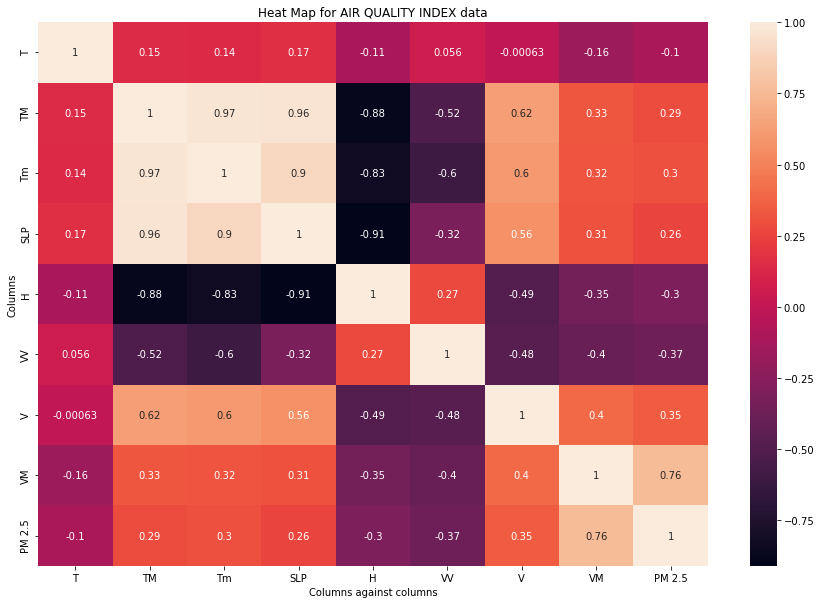

In [8]:
print('The Heat Map showing the correlation of each columns')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.title("Heat Map for AIR QUALITY INDEX data")
plt.xlabel("Columns against columns")
plt.ylabel("Columns")
plt.show()

## Inference from the Correlation table and Heat map
1. As the **TM(Maximum Temperature)** increases, then the **Tm(Minimum Temperature)** also increases and vice versa, as it has `0.97` of VERY STRONG POSITIVE pearson correlation value. 
2. As the **TM(Maximum Temperature)** increases, then the **SLP(Atmospheric pressure at sea level [hPa])** also increases and vice versa, as it has `0.96` of VERY STRONG POSITIVE pearson correlation value.
3. As the **TM(Maximum Temperature)** increases, then the **H(Average relative humidity %)** decreases and vice versa, as it has`-0.88` of VERY STRONG NEGATIVE pearson correlation value.
4. As the **Tm(Minimum Temperature)** increases, then the **SLP(Atmospheric pressure at sea level [hPa])** also increases and vice versa, as it has `0.9` of VERY STRONG POSITIVE pearson correlation value.
5. As the **Tm(Minimum Temperature)** increases, then the **H(Average relative humidity %)** decreases and vice versa, as it has`-0.83` of VERY STRONG NEGATIVE pearson correlation value.
6. As the **SLP(Atmospheric pressure at sea level [hPa])** increases, then the **H(Average relative humidity %)** decreases and vice versa, as it has `-0.91` of VERY STRONG NEGATIVE pearson correlation value.
7. As the **VM(Maximum sustained wind speed [Km/h])** increases, then the **PM 2.5 (Fine Particulate Matter)** also increases and vice versa, as it has `0.76` of STRONG POSITIVE pearson correlation value. 

## Scatter plot Analysis

Scatter plot for the variables MAXIMUM & MINIMUM temperature and the correlation between these two are:
          TM        Tm
TM  1.000000  0.967276
Tm  0.967276  1.000000


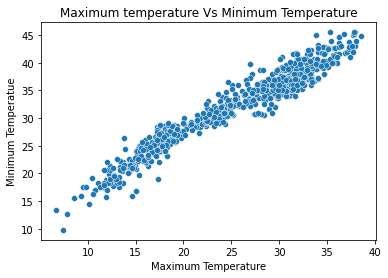

In [9]:
print('Scatter plot for the variables MAXIMUM & MINIMUM temperature and the correlation between these two are:')
s1 = df[['TM','Tm']]
print(s1.corr(method='pearson'))
sns.scatterplot(x=df['TM'],y=df['Tm'])
plt.title("Maximum temperature Vs Minimum Temperature")
plt.xlabel('Maximum Temperature')
plt.ylabel('Minimum Temperatue')
plt.show()

Scatter plot for the variables MAXIMUM TEMPERATURE & Atmospheric pressure at sea level (SLP) and the correlation between these   two are:
           TM       SLP
TM   1.000000  0.958892
SLP  0.958892  1.000000


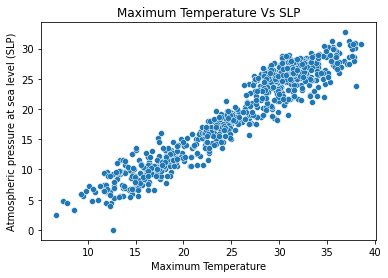

In [10]:
print('Scatter plot for the variables MAXIMUM TEMPERATURE & Atmospheric pressure at sea level (SLP) and the correlation between these   two are:')
s2 = df[['TM','SLP']]
print(s2.corr(method='pearson'))
sns.scatterplot(x=df["TM"],y=df["SLP"])
plt.title('Maximum Temperature Vs SLP')
plt.xlabel("Maximum Temperature")
plt.ylabel("Atmospheric pressure at sea level (SLP)")
plt.show()

Scatter plot for the variables MAXIMUM TEMPERATURE & Average Relative Humidity and the correlation between these two are:
          TM         H
TM  1.000000 -0.884383
H  -0.884383  1.000000


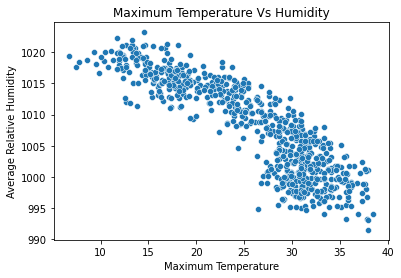

In [11]:
print('Scatter plot for the variables MAXIMUM TEMPERATURE & Average Relative Humidity and the correlation between these two are:')
s3 = df[['TM','H']]
print(s3.corr(method='pearson'))
sns.scatterplot(x=df['TM'],y=df['H'])
plt.title('Maximum Temperature Vs Humidity')
plt.xlabel("Maximum Temperature")
plt.ylabel("Average Relative Humidity")
plt.show()

Scatter plot for the variables MINIMUM TEMPERATURE & Atmospheric pressure at sea level (SLP) and the correlation between these   two are:
           Tm       SLP
Tm   1.000000  0.896699
SLP  0.896699  1.000000


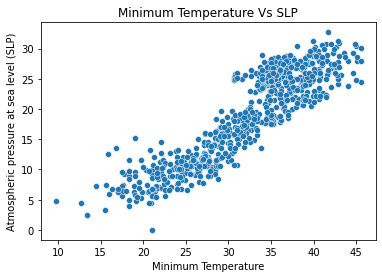

In [12]:
print('Scatter plot for the variables MINIMUM TEMPERATURE & Atmospheric pressure at sea level (SLP) and the correlation between these   two are:')
s4 = df[['Tm','SLP']]
print(s4.corr(method='pearson'))
sns.scatterplot(x=df["Tm"],y=df["SLP"])
plt.title('Minimum Temperature Vs SLP')
plt.xlabel("Minimum Temperature")
plt.ylabel("Atmospheric pressure at sea level (SLP)")
plt.show()

Scatter plot for the variables MINIMUM TEMPERATURE & Average Relative Humidity and the correlation between these two are:
          Tm         H
Tm  1.000000 -0.829254
H  -0.829254  1.000000


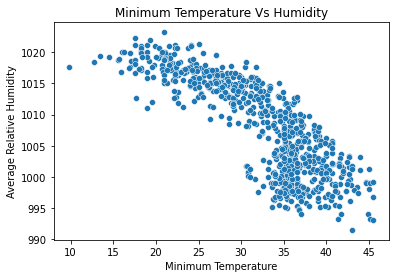

In [13]:
print('Scatter plot for the variables MINIMUM TEMPERATURE & Average Relative Humidity and the correlation between these two are:')
s5 = df[['Tm','H']]
print(s5.corr(method='pearson'))
sns.scatterplot(x=df['Tm'],y=df['H'])
plt.title('Minimum Temperature Vs Humidity')
plt.xlabel("Minimum Temperature")
plt.ylabel("Average Relative Humidity")
plt.show()

Scatter plot for the variables Atmospheric pressure at sea level & Average Relative Humidity and the correlation between these   two are:
          SLP         H
SLP  1.000000 -0.909514
H   -0.909514  1.000000


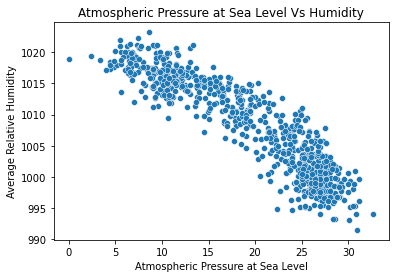

In [14]:
print('Scatter plot for the variables Atmospheric pressure at sea level & Average Relative Humidity and the correlation between these   two are:')
s6 = df[['SLP','H']]
print(s6.corr(method='pearson'))
sns.scatterplot(x=df['SLP'],y=df['H'])
plt.title('Atmospheric Pressure at Sea Level Vs Humidity')
plt.xlabel("Atmospheric Pressure at Sea Level")
plt.ylabel("Average Relative Humidity")
plt.show()

Scatter plot for the variables Maximum sustained wind speed [Km/h] & Fine Particulate Matter and the correlation between these   two are:
              VM    PM 2.5
VM      1.000000  0.760777
PM 2.5  0.760777  1.000000


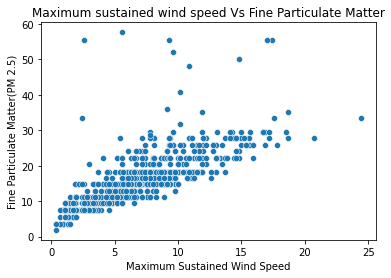

In [15]:
print('Scatter plot for the variables Maximum sustained wind speed [Km/h] & Fine Particulate Matter and the correlation between these   two are:')
s7 = df[['VM','PM 2.5']]
print(s7.corr(method='pearson'))
sns.scatterplot(x=df['VM'],y=df['PM 2.5'])
plt.title('Maximum sustained wind speed Vs Fine Particulate Matter')
plt.xlabel('Maximum Sustained Wind Speed')
plt.ylabel('Fine Particulate Matter(PM 2.5)')
plt.show()

## Histogram Analysis

Histogram Analysis


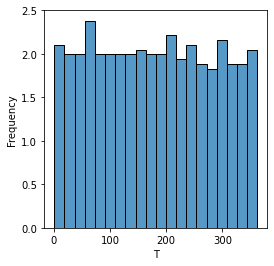

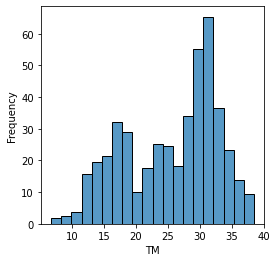

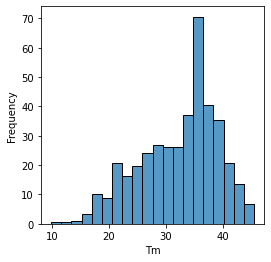

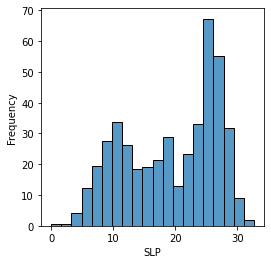

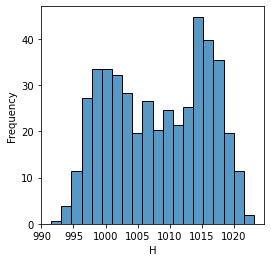

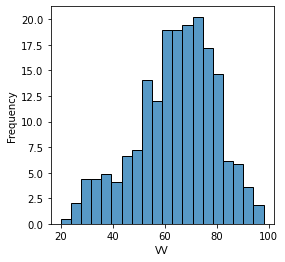

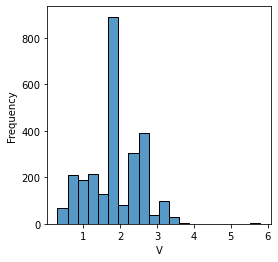

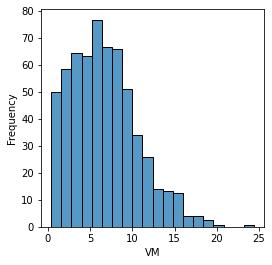

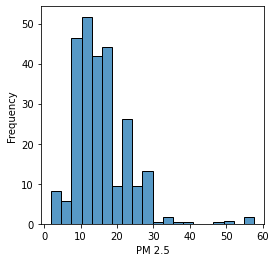

In [16]:
print('Histogram Analysis')
cols = list(df.columns)
for i in cols:
    plt.figure(figsize=(4,4))
    sns.histplot(df[i],bins=20,stat='frequency')
    plt.ylabel('Frequency')
    #plt.xlabel('Values')
    plt.show()

**From the Histogram , we find that none of the variable is normally distributed as the mean & median are not same.**
**And it is right or left skewed data.**

## Boxplot Analysis

Boxplot Analysis


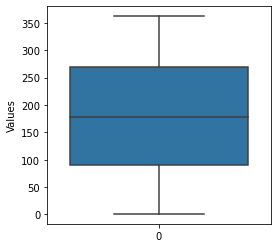

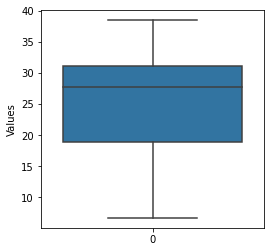

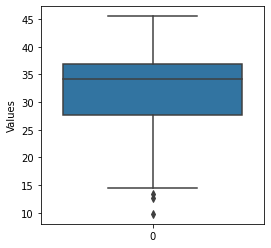

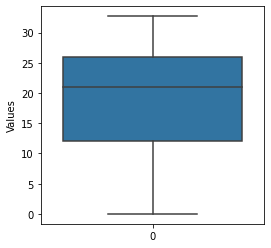

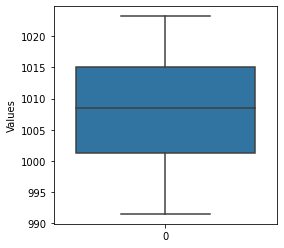

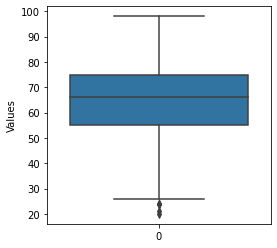

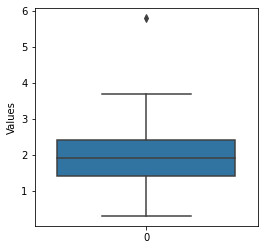

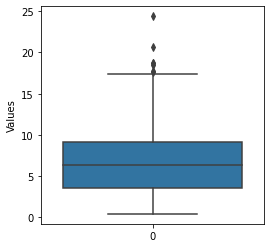

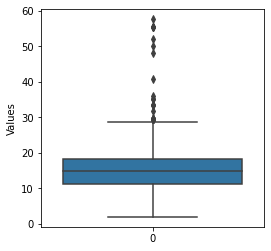

In [17]:
print('Boxplot Analysis')
for i in cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df[i])
    plt.ylabel('Values')
    plt.show()

**Outlier Treatment**

In [18]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_out = df[((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
print("The Shape of the outlier data is {}".format(df_out.shape))

The Shape of the outlier data is (40, 9)


**Now we remove the outliers to do Machine Learning**

In [20]:
df1 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
column = list(df.columns)
df = np.where(df[column]>Q3,np.median(df[column]),np.where(df[column]<Q1,np.median(df[column]),df))

In [22]:
type(df)

numpy.ndarray

In [23]:
df2 = pd.DataFrame(df,columns=column)

In [24]:
print("The Shape of the dataset that is preprocessed is {}".format(df1.shape))

The Shape of the dataset that is preprocessed is (690, 9)


In [25]:
print("-------------The Head of the Pre Processed Data-----------------")
df1.head()

-------------The Head of the Pre Processed Data-----------------


T    TM    Tm   SLP       H    VV    V   VM  PM 2.5
3   8.0   8.6  15.5   3.3  1018.7  72.0  0.8  8.1    20.6
4   9.0  12.4  20.9   4.4  1017.3  61.0  1.3  8.7    22.2
5  13.0  16.0  25.2  10.0  1013.2  79.0  0.6  4.8    11.1
6  14.0  13.4  21.0   9.2  1015.1  87.0  0.5  1.5     7.6
7  15.0  14.3  22.6   6.6  1016.3  76.0  0.8  0.4     3.5

**Pairplot for the pre processed data**

Pairplot of the pre processed data


<Figure size 576x288 with 0 Axes>

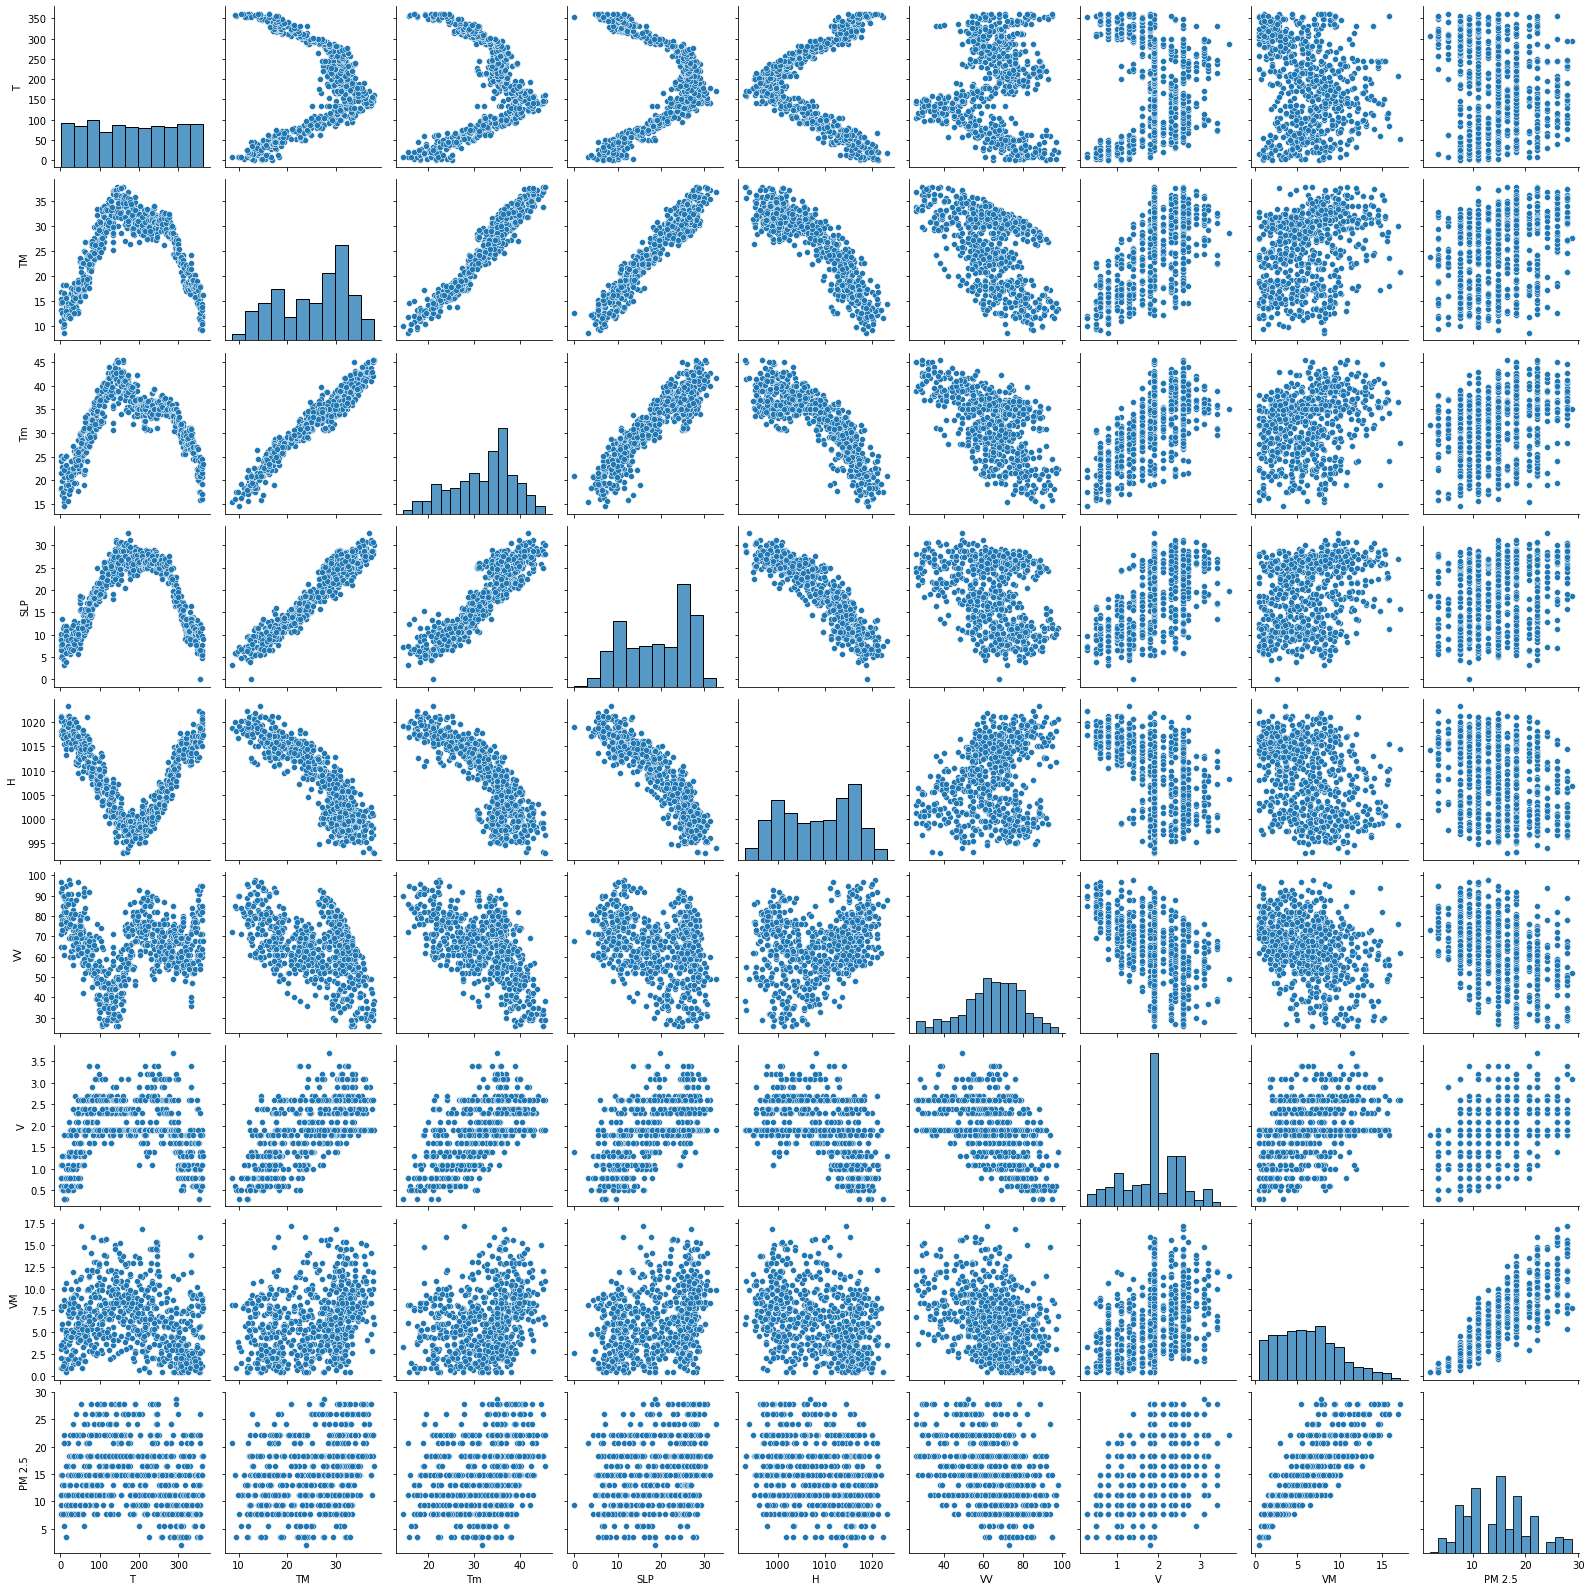

In [26]:
print('Pairplot of the pre processed data')
plt.figure(figsize=(8,4))
sns.pairplot(df1)
#plt.title('Pairplot of AIR QUALITY INDEX DATA')
plt.show()

**From the above pairplot we found that the data is distributed as same as the before data , and the correlation is also same as the before data.***

In [27]:
print('The Correlation of all columns in the pre processed data are:')
df1.corr()

The Correlation of all columns in the pre processed data are:


T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.142948  0.136038  0.160619 -0.107379  0.049328 -0.015133   
TM      0.142948  1.000000  0.966823  0.959643 -0.884914 -0.499855  0.623789   
Tm      0.136038  0.966823  1.000000  0.897839 -0.830615 -0.583319  0.600704   
SLP     0.160619  0.959643  0.897839  1.000000 -0.909733 -0.297073  0.558388   
H      -0.107379 -0.884914 -0.830615 -0.909733  1.000000  0.255735 -0.489304   
VV      0.049328 -0.499855 -0.583319 -0.297073  0.255735  1.000000 -0.483078   
V      -0.015133  0.623789  0.600704  0.558388 -0.489304 -0.483078  1.000000   
VM     -0.169945  0.307703  0.295568  0.302172 -0.329066 -0.370060  0.419923   
PM 2.5 -0.124551  0.291421  0.294127  0.270355 -0.307119 -0.410880  0.422773   

              VM    PM 2.5  
T      -0.169945 -0.124551  
TM      0.307703  0.291421  
Tm      0.295568  0.294127  
SLP     0.302172  0.270355  
H      -0.329066 -0.307119  
VV     -0.370060 -0.410880  
V       0.419923  0.422773  
VM      1.000000  0.840988  
PM 2.5  0.840988  1.000000

------------The Heat Map of the pre processed data-------------------


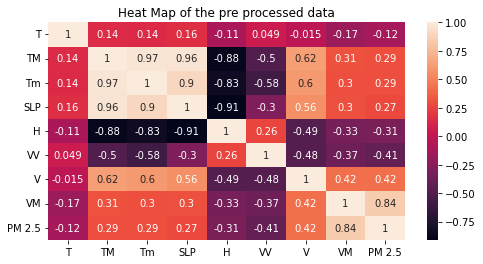

In [28]:
print('------------The Heat Map of the pre processed data-------------------')
plt.figure(figsize=(8,4))
sns.heatmap(df1.corr(),annot=True)
plt.title("Heat Map of the pre processed data")
plt.show()

**From the heat map and correlation , we found that correlation of `VM` as increased to `0.84` for `PM 2.5.`**

## Feature Importance

In [29]:
X = df1.iloc[:,:-1] #independent variables
y = df1.iloc[:,-1] #dependent variable

In [30]:
from sklearn.ensemble import ExtraTreesRegressor

In [31]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
print("The Feature Importance of Air Quality Data is {}".format(list(model.feature_importances_)))

The Feature Importance of Air Quality Data is [0.036255853466542455, 0.03253203958317989, 0.03062522287763052, 0.03086127995378728, 0.03632032683989407, 0.06050424453873962, 0.05304191038928197, 0.7198591223509444]


Bar Plot for feature importances


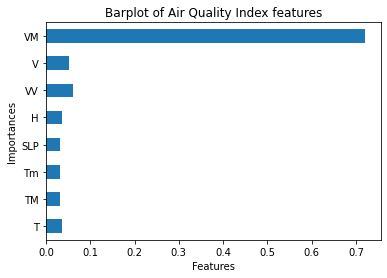

In [33]:
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
print("Bar Plot for feature importances")
feature_importances.plot(kind='barh')
plt.title('Barplot of Air Quality Index features')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.show()

***Test Train Split***

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [37]:
print("The Coefficients of the Linear Regression model that we created are {}".format(lin_reg.coef_))

The Coefficients of the Linear Regression model that we created are [ 0.00211494 -0.3499491  -0.0436759   0.15439801 -0.14992871 -0.0904351
  0.983644    1.20787028]


In [38]:
print("The Intercept of the Linear Regression model that we created is {}".format(lin_reg.intercept_))

The Intercept of the Linear Regression model that we created is 169.09342955593365


From the above results, 
1. we have loaded the training data into the model 
2. we got the Coefficients of the Linear Regression model.
3. we have also got the Intercept of the Linear model.
4. Now we interpret that, with holding the other values fixed and taking a variable which is `negative` , as there is `one unit increase` , we get that there will be a `decrease` of the amount of coefficient that we obtained in `AQI PM 2.5`.
5. Similarly, if we take a positive valued coefficient , we will get an increased value in `AQI PM 2.5`.

**Evaluation on training data**

In [39]:
print("Coefficient of determination R^2 on training dataset is: {}".format(lin_reg.score(X_train,y_train)))

Coefficient of determination R^2 on training dataset is: 0.7358854077900796


**Evaluation on test data**

In [40]:
print("Coefficient of determination R^2 on test dataset is: {}".format(lin_reg.score(X_test,y_test)))

Coefficient of determination R^2 on test dataset is: 0.7091853801686951


**Cross validation Score**

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_score = cross_val_score(lin_reg,X,y,cv=5)
print("The Mean value for Cross validation score of Air Quality Index Data is {}".format(cross_score.mean()))

The Mean value for Cross validation score of Air Quality Index Data is 0.7024789740219586


**From the above results, we find that the model is `Good` with the data that we have loaded 
also we prove that by using the `Cross-validation`.
Now, we do some visualization and also look to find the values of the `error`.**

### Model Evaluation

In [43]:
lin_coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
lin_coeff_df

Coefficient
T       0.002115
TM     -0.349949
Tm     -0.043676
SLP     0.154398
H      -0.149929
VV     -0.090435
V       0.983644
VM      1.207870

**ERRORS**

In [44]:
lin_pred = lin_reg.predict(X_test)

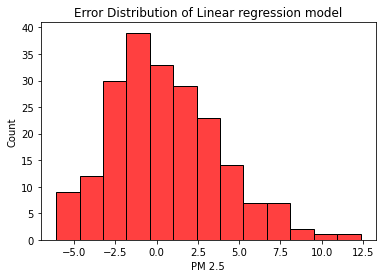

In [45]:
sns.histplot(y_test - lin_pred,color='red')
plt.title("Error Distribution of Linear regression model")
plt.show()

print("The Mean of the Error is {}".format(lin_pred.mean()))
print("The Median of the Error is {}".format(np.median(lin_pred)))
if (round(lin_pred.mean()) == round(np.median(lin_pred))):
    print("The error is distributed normally")
else:
    print("The error is skewed")

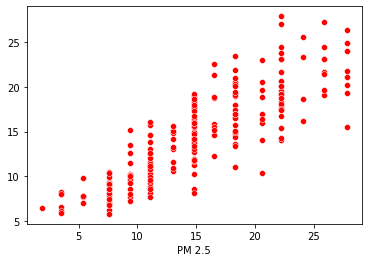

In [46]:
sns.scatterplot(x=y_test,y=lin_pred,color='red')
#plt.title("Actual Vs Prediction(Linear Regression)")
#plt.xlabel('Actual')
#plt.ylabel('Prediction')
plt.show()

**Loss Functions**

In [47]:
from sklearn import metrics

In [48]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,lin_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,lin_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,lin_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.6239984128745055
Mean Squared Error: 11.16315357002589
Root Mean Squared Error: 3.341130582606117
-------------------------------------------------------------------


# Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [50]:
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_reg = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [51]:
print("The Best Parameters for this model {}",format(ridge_reg.best_params_))

The Best Parameters for this model {} {'alpha': 30}


In [52]:
print("The Best Score for this model {}".format(ridge_reg.best_score_))

The Best Score for this model -9.246186727368656


**Model Evaluation for Training data of Ridge Regression**

In [53]:
print("The Coefficient of R^2 on training dataset {}".format(ridge_reg.score(X_train,y_train)))

The Coefficient of R^2 on training dataset -8.873553992658303


**Model Evaluation for test data of Ridge Regression**

In [54]:
print("The Coefficient of R^2 on test data {}".format(ridge_reg.score(X_test,y_test)))

The Coefficient of R^2 on test data -11.158539284119183


**Cross Validation**

In [55]:
cross_val_ridge = cross_val_score(ridge_reg,X,y,cv=5)
print("The Mean value of Cross Validation Score for the Air Quality Index dataset is {}".format(cross_val_ridge.mean()))

The Mean value of Cross Validation Score for the Air Quality Index dataset is -9.928565570744833


**ERRORS**

In [56]:
ridge_pred = ridge_reg.predict(X_test)

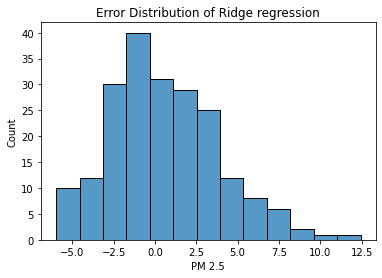

In [57]:
sns.histplot(y_test - ridge_pred)
plt.title('Error Distribution of Ridge regression')
plt.show()

print("The Mean of the Error is {}".format(ridge_pred.mean()))
print("The Median of the Error is {}".format(np.median(ridge_pred)))
if (round(ridge_pred.mean()) == round(np.median(ridge_pred))):
    print("The error is distributed normally")
else:
    print("The error is skewed")

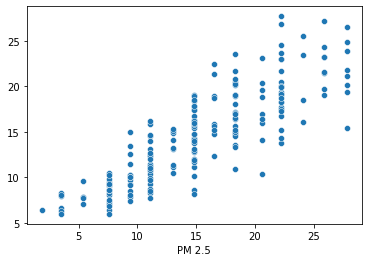

In [58]:
sns.scatterplot(x=y_test,y=ridge_pred)
plt.show()

**Loss Functions**

In [59]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,ridge_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,ridge_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,ridge_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.6161233834360575
Mean Squared Error: 11.158539284119183
Root Mean Squared Error: 3.3404399836128147
-------------------------------------------------------------------


# Lasso Regression

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)

C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1479.6063654923514, tolerance: 1.3043324170984458
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1422.2621137367319, tolerance: 1.235671678756477
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1761.8714398984644, tolerance: 1.2457801450777204
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [62]:
print("The Best Parameters of this model is:",lasso_reg.best_params_)
print("The Best Score of this model is:",lasso_reg.best_score_)

The Best Parameters of this model is: {'alpha': 0.01}
The Best Score of this model is: -9.256380730642025


**Model Evaluation for Training data in Lasso Regression**

In [63]:
print("The Coefficient of R^2 on training dataset {}".format(lasso_reg.score(X_train,y_train)))

The Coefficient of R^2 on training dataset -8.863567213777502


**Model Evaluation for Test data in Lasso Regression**

In [64]:
print("The Coefficient of R^2 on test dataset {}".format(lasso_reg.score(X_test,y_test)))

The Coefficient of R^2 on test dataset -11.160481640173646


**Cross validation**

In [65]:
cross_val_lasso = cross_val_score(lasso_reg,X,y,cv=5)
print("The Mean value of Cross Validation Score for the Air Quality Index dataset is {}".format(cross_val_lasso.mean()))

C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2154.5859173934673, tolerance: 1.6204018004535148
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2047.7797521856785, tolerance: 1.6648882448979592
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2062.203463171421, tolerance: 1.5657198823529412
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. 

C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2791.765363311157, tolerance: 1.8458549981884063
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1706.0519056912015, tolerance: 1.508072657596372
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1876.0698854015004, tolerance: 1.4650589795918372
  model = cd_fast.enet_coordinate_descent(
C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. Y

The Mean value of Cross Validation Score for the Air Quality Index dataset is -9.900282297125587


C:\DR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2301.425505935984, tolerance: 1.8632364565217396
  model = cd_fast.enet_coordinate_descent(


**ERRORS**

In [66]:
lasso_pred = lasso_reg.predict(X_test)

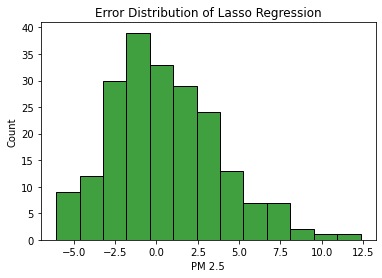

In [67]:
sns.histplot(y_test-lasso_pred,color='green')
plt.title("Error Distribution of Lasso Regression")
plt.show()

print("The Mean of the Error is {}".format(lasso_pred.mean()))
print("The Median of the Error is {}".format(np.median(lasso_pred)))
if (round(lasso_pred.mean()) == round(np.median(lasso_pred))):
    print("The error is distributed normally")
else:
    print("The error is skewed")

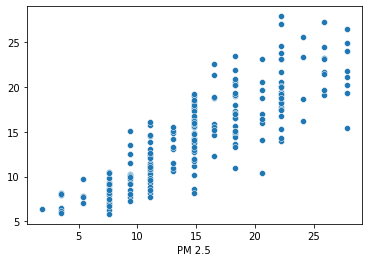

In [68]:
sns.scatterplot(x=y_test,y=lasso_pred)
plt.show()

**Loss Functions**

In [69]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,lasso_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,lasso_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.62074041355566
Mean Squared Error: 11.160481640173646
Root Mean Squared Error: 3.3407307045276258
-------------------------------------------------------------------


# Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

**Model Evaluation of training dataset for Decision Tree**

In [72]:
print("The Coefficient of determination R^2  on training dataset: {}".format(dtree.score(X_train, y_train)))

The Coefficient of determination R^2  on training dataset: 1.0


**Model Evaluation of testing dataset for Decision Tree**

In [73]:
print("The Coefficient of determination R^2 on test dataset: {}".format(dtree.score(X_test, y_test)))

The Coefficient of determination R^2 on test dataset: 0.4957601726757902


**Cross Validation Score**

In [74]:
cross_dtree = cross_val_score(dtree,X,y,cv=5)
print("The Mean value of Cross Validation Score for the Air Quality Index dataset is {}".format(cross_dtree.mean()))

The Mean value of Cross Validation Score for the Air Quality Index dataset is 0.45218216073490447


**Tree Visualization**

In [75]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [76]:
cols = list(df1.columns[:-1])

In [77]:
cols

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [78]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

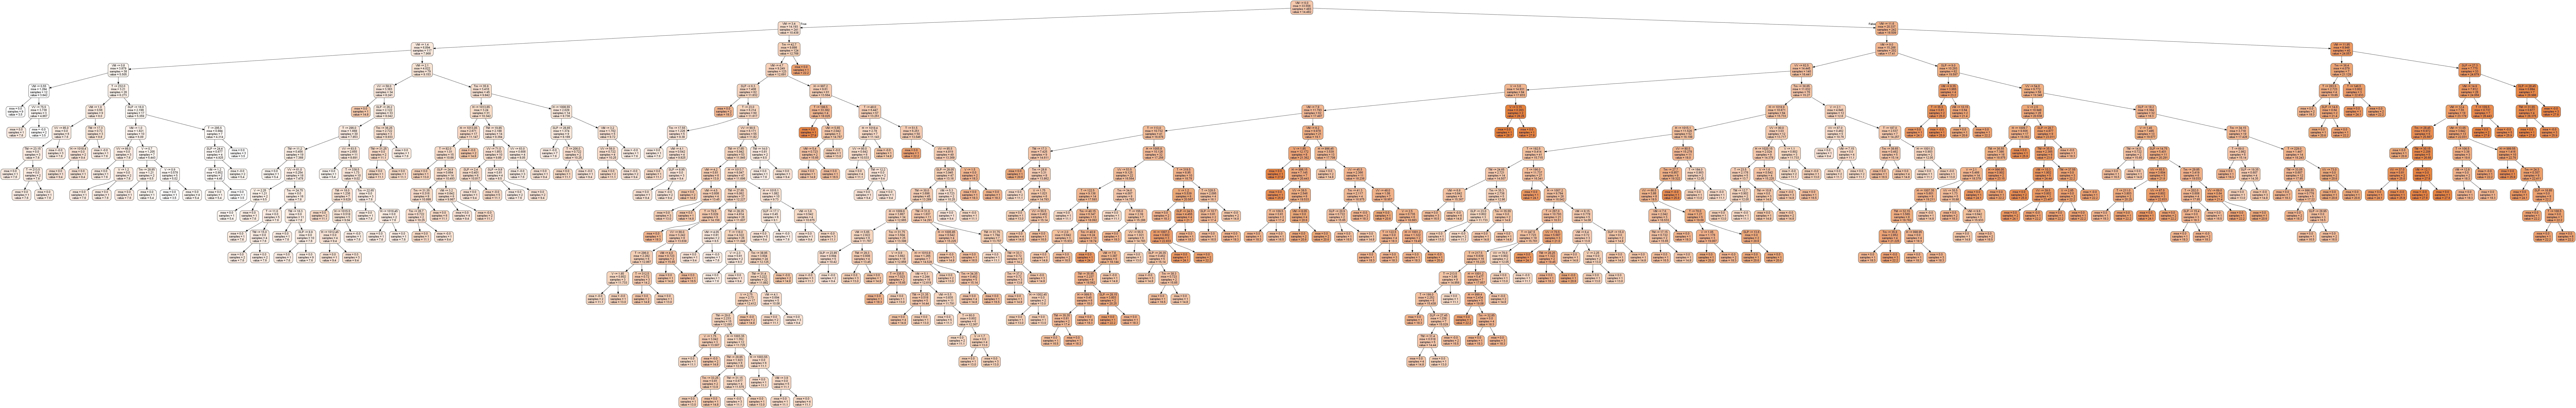

In [79]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=cols,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Errors**

In [80]:
dtree_pred = dtree.predict(X_test)

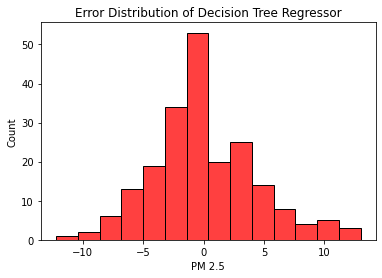

In [81]:
sns.histplot(y_test-dtree_pred,color='red')
plt.title("Error Distribution of Decision Tree Regressor")
plt.show()

print("The Mean of the Error is {}".format(dtree_pred.mean()))
print("The Median of the Error is {}".format(np.median(dtree_pred)))
if (round(dtree_pred.mean()) == round(np.median(dtree_pred))):
    print("The error is distributed normally")
else:
    print("The error is skewed")

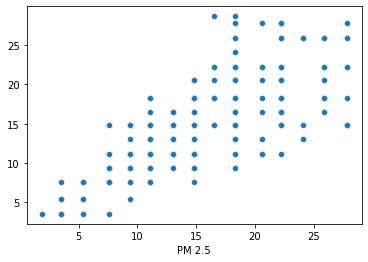

In [82]:
sns.scatterplot(x=y_test,y=dtree_pred)
plt.show()

**Loss Functions**

In [83]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,dtree_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,dtree_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,dtree_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 3.2135265700483093
Mean Squared Error: 19.355652173913043
Root Mean Squared Error: 4.399505901111287
-------------------------------------------------------------------


## Hyperparameter Tuning of Decision Tree Regressor

In [84]:
params={"splitter": ["best","random"],"max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],"min_samples_leaf": [1,2,3,4,5],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],"max_features": ["auto","log2","sqrt",None ],
"max_leaf_nodes":[None,10,20,30,40,50,60,70]}

In [85]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [86]:
print("The Best parameters for AIR QUALITY INDEX data in DecisionTreeRegressor is {}".format(random_search.best_params_))
print("---------------------------------------------------------------------------------------------")
print("The Best Score for AQI data in DecisionTreeRegressor is {}".format(random_search.best_score_))

The Best parameters for AIR QUALITY INDEX data in DecisionTreeRegressor is {'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
---------------------------------------------------------------------------------------------
The Best Score for AQI data in DecisionTreeRegressor is -11.036088359772988


**Model Evaluation for training data in hyper parameter tuned Decision Tree Regressor**

In [87]:
print("The Coefficient of determination R^2 on training dataset {}".format(random_search.score(X_train,y_train)))

The Coefficient of determination R^2 on training dataset -9.752122461738853


**Model Evaluation for test data in hyper parameter tuned Decision Tree Regressor**

In [88]:
print("The Coefficient of determination R^2 on test dataset {}".format(random_search.score(X_test,y_test)))

The Coefficient of determination R^2 on test dataset -11.755954358477643


**Cross Validation**

In [89]:
hyp_dtree_cross = cross_val_score(random_search,X,y,cv=5)
print("The Mean value of Cross Validation Score for the Air Quality Index dataset is {}".format(hyp_dtree_cross.mean()))

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits
Fitting 10 folds for each of 10240 candidates, totalling 102400 fits
Fitting 10 folds for each of 10240 candidates, totalling 102400 fits
Fitting 10 folds for each of 10240 candidates, totalling 102400 fits
Fitting 10 folds for each of 10240 candidates, totalling 102400 fits
The Mean value of Cross Validation Score for the Air Quality Index dataset is -11.463653779998733


**ERRORS**

In [90]:
hyp_dtree_pred = random_search.predict(X_test)

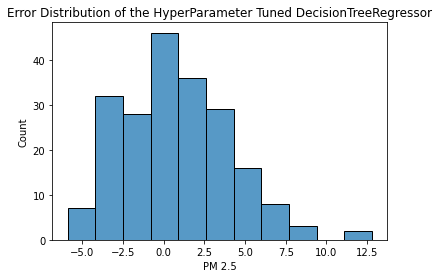

In [91]:
sns.histplot(y_test - hyp_dtree_pred)
plt.title("Error Distribution of the HyperParameter Tuned DecisionTreeRegressor")
plt.show()

print("The Mean of the Error is {}".format((y_test-hyp_dtree_pred).mean()))
print("The Median of the Error is {}".format(np.median((y_test-hyp_dtree_pred))))
if [((y_test-hyp_dtree_pred).mean()) == (y_test-hyp_dtree_pred).median()]:
    print("The error is distributed normally")
else:
      print("The error is skewed")

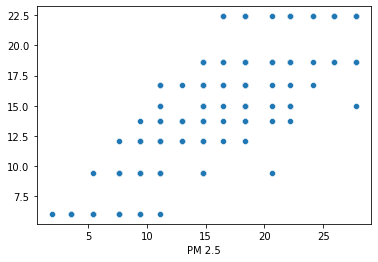

In [92]:
sns.scatterplot(x=y_test,y=hyp_dtree_pred)
plt.show()

**Loss Functions**

In [93]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,hyp_dtree_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,hyp_dtree_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,hyp_dtree_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.640650942740726
Mean Squared Error: 11.755954358477643
Root Mean Squared Error: 3.4286957226440555
-------------------------------------------------------------------


# RandomForestRegressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rand_reg = RandomForestRegressor()
rand_reg.fit(X_train,y_train)

RandomForestRegressor()

**Model Evaluation for training dataset using RandomForestRegressor**

In [96]:
print("The Coefficient of determination R^2 on training dataset {}".format(rand_reg.score(X_train,y_train)))

The Coefficient of determination R^2 on training dataset 0.9578426643582112


**Model Evaluation for test dataset using RandomForestRegressor**

In [97]:
print("The Coefficient of determination R^2 on test data {}".format(rand_reg.score(X_test,y_test)))

The Coefficient of determination R^2 on test data 0.7022138941109559


**Cross validation**

In [98]:
rand_cross = cross_val_score(rand_reg,X,y,cv=5)
print("The Mean value of Cross validation Score for AQI data is {}".format(rand_cross.mean()))

The Mean value of Cross validation Score for AQI data is 0.6770279966877814


**ERRORS**

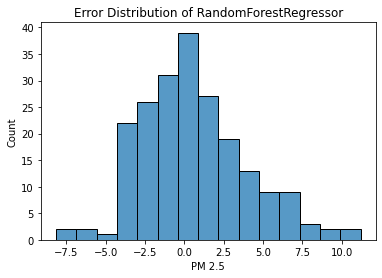

In [99]:
rand_pred = rand_reg.predict(X_test)
sns.histplot(y_test - rand_pred)
plt.title("Error Distribution of RandomForestRegressor")
plt.show()

print("The Mean of the Error is {}".format((y_test-rand_pred).mean()))
print("The Median of the Error is {}".format(np.median((y_test-rand_pred))))
if [((y_test-rand_pred).mean()) == (y_test-rand_pred).median()]:
    print("The error is distributed normally")
else:
      print("The error is skewed")

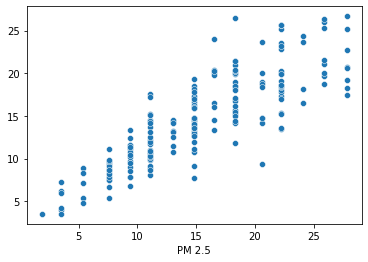

In [100]:
sns.scatterplot(x=y_test,y=rand_pred)
plt.show()

**Loss Functions**

In [101]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,rand_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,rand_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,rand_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.5641545893719826
Mean Squared Error: 11.430759681159442
Root Mean Squared Error: 3.3809406503456167
-------------------------------------------------------------------


## HyperParameter Tuning of RandomForestRegressor

In [102]:
from sklearn.model_selection import RandomizedSearchCV

***RandomizedSearchCV***

In [103]:
## Number of trees in RandomForest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

## Number of features to consider at every split
max_features = ['auto','sqrt']

## Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]

## Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

## Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


**Creating a RandomGrid**

In [104]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [105]:
hyp_rand_reg = RandomForestRegressor()

In [106]:
hyp_random = RandomizedSearchCV(estimator=hyp_rand_reg,param_distributions=random_grid,scoring='neg_mean_squared_error',
                               n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=1)

In [107]:
hyp_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.5s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [108]:
print("The Best Paramater of RandomForestRegressor is {}".format(hyp_random.best_params_))

The Best Paramater of RandomForestRegressor is {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5}


In [109]:
print("The Best Score of RandomForestRegressor is {}".format(hyp_random.best_score_))

The Best Score of RandomForestRegressor is -9.535898669470779


In [110]:
hyp_rand = hyp_random.predict(X_test)

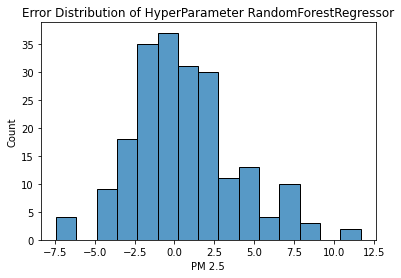

In [112]:
sns.histplot(y_test-hyp_rand)
plt.title('Error Distribution of HyperParameter RandomForestRegressor')
plt.show()

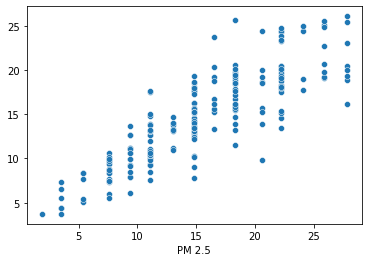

In [114]:
sns.scatterplot(x=y_test,y=hyp_rand)
plt.show()

**Loss Functions**

In [115]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,hyp_rand))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,hyp_rand))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,hyp_rand)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.5115922947968214
Mean Squared Error: 11.01038851548215
Root Mean Squared Error: 3.3181905483986527
-------------------------------------------------------------------


# KNearest Neighbor Regressor

In [111]:
from sklearn.neighbors import KNeighborsRegressor

In [134]:
kn_reg = KNeighborsRegressor(n_neighbors = 3)
kn_reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

**Model Evaluation for training dataset**

In [135]:
print("The Coefficient of determination R^2 for training dataset is {}".format(kn_reg.score(X_train,y_train)))

The Coefficient of determination R^2 for training dataset is 0.6766614871829066


**Model Evaluation for testing dataset**

In [136]:
print("The Coefficient of determination R^2 for testing dataset is {}".format(kn_reg.score(X_test,y_test)))

The Coefficient of determination R^2 for testing dataset is 0.47252054270159405


**Cross Validation**

In [137]:
kn_cross = cross_val_score(kn_reg,X,y,cv=5)
print("The Mean value of cross validation score for AQI dataset is {}".format(kn_cross.mean()))

The Mean value of cross validation score for AQI dataset is 0.27421834978950066


**ERRORS**

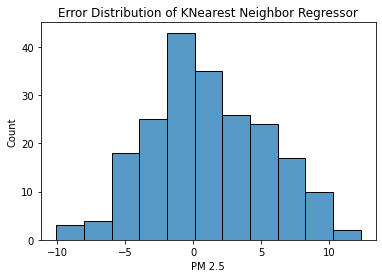

In [138]:
kn_pred = kn_reg.predict(X_test)
sns.histplot(y_test-kn_pred)
plt.title("Error Distribution of KNearest Neighbor Regressor")
plt.show()

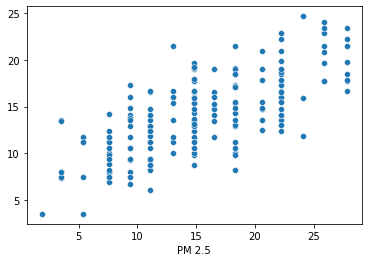

In [139]:
sns.scatterplot(x=y_test,y=kn_pred)
plt.show()

**Loss Functions**

In [140]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,kn_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,kn_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,kn_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 3.5740740740740744
Mean Squared Error: 20.247724100912507
Root Mean Squared Error: 4.499747115217977
-------------------------------------------------------------------


## HyperParameter Tuning for KNearest Neighbor Regressor

In [129]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

In [132]:
accuracy_rate

[-22.30766451959206,
 -22.3682063768116,
 -22.432239669421488,
 -22.433482336956523,
 -22.464494232475598,
 -22.57489301529791,
 -22.719770688620184,
 -22.720797101449275,
 -22.82631285122745,
 -22.882352463768115,
 -23.01662035426731,
 -23.285248697916668,
 -23.523217351158216,
 -23.55543232535981,
 -23.586982376095904,
 -23.60305525362319,
 -23.696865471014497,
 -23.82472138420586,
 -23.907823122529646,
 -23.923036738719485,
 -24.173528180354268,
 -24.235424718196462,
 -24.32470576231884,
 -24.408982184203758,
 -24.585126677402037,
 -24.74310316844129,
 -24.84239509555567,
 -24.897580950080517,
 -25.079759957170218,
 -25.143990305140395,
 -25.22649484302844,
 -25.34237842886515,
 -25.414617284826978,
 -25.646343632581857,
 -25.903779464540918,
 -25.995772471797345,
 -26.001735507246376,
 -26.093130854033866,
 -33.884971014492756]

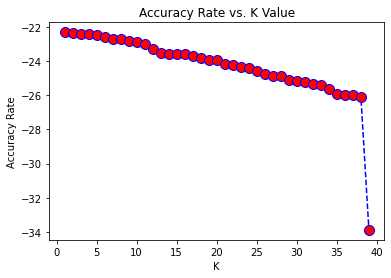

In [133]:
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title("Accuracy Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

In [141]:
## From this plot we found that k=1 is the best value.
hyp_knn = KNeighborsRegressor(n_neighbors=1)
hyp_knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [142]:
print("The Coefficient of determination R^2 for training dataset is {}".format(hyp_knn.score(X_train,y_train)))

The Coefficient of determination R^2 for training dataset is 1.0


In [143]:
print("The Coefficient of determination R^2 for test dataset is {}".format(hyp_knn.score(X_test,y_test)))

The Coefficient of determination R^2 for test dataset is 0.26943733480448073


In [144]:
hyp_knn_cross = cross_val_score(hyp_knn,X,y,cv=5)
print("The Mean value of cross validation score for AQI dataset is {}".format(hyp_knn_cross.mean()))

The Mean value of cross validation score for AQI dataset is -0.01933733481348756


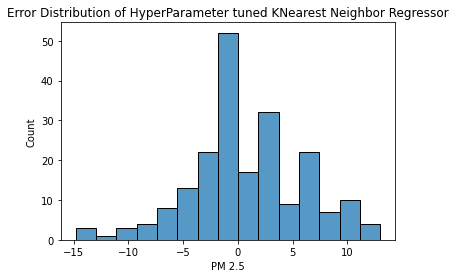

In [145]:
hyp_knn_pred = hyp_knn.predict(X_test)
sns.histplot(y_test-hyp_knn_pred)
plt.title("Error Distribution of HyperParameter tuned KNearest Neighbor Regressor")
plt.show()

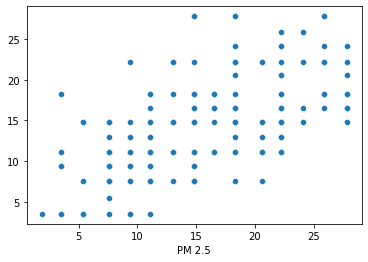

In [146]:
sns.scatterplot(x=y_test,y=hyp_knn_pred)
plt.show()

**Loss Functions**

In [147]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,hyp_knn_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,hyp_knn_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,hyp_knn_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 4.132850241545894
Mean Squared Error: 28.043236714975844
Root Mean Squared Error: 5.295586531723926
-------------------------------------------------------------------


# XgboostRegressor

In [148]:
import xgboost as xgb

In [149]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

**Model Evaluation for training dataset**

In [150]:
print("The Coefficient of determination R^2 on training set is {}".format(xg_reg.score(X_train, y_train)))

The Coefficient of determination R^2 on training set is 0.9998964660689378


**Model Evaluation for test dataset**

In [152]:
print("The Coefficient of determination R^2 on test set is {}".format(xg_reg.score(X_test, y_test)))

The Coefficient of determination R^2 on test set is 0.7055820699801619


**Cross validation**

In [153]:
xg_cross = cross_val_score(xg_reg,X,y,cv=5)
print("The Mean Value for Cross Validation using XgboostRegressor is {}".format(xg_cross.mean()))

The Mean Value for Cross Validation using XgboostRegressor is 0.6253477041445263


**ERRORS**

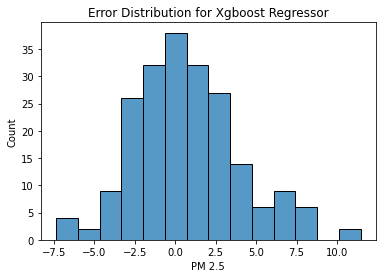

In [154]:
xg_pred = xg_reg.predict(X_test)
sns.histplot(y_test-xg_pred)
plt.title("Error Distribution for Xgboost Regressor")
plt.show()

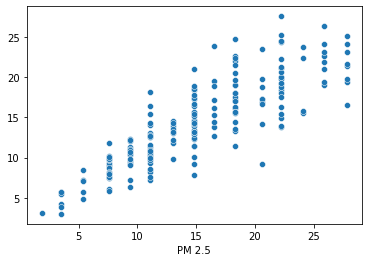

In [155]:
sns.scatterplot(x=y_test,y=xg_pred)
plt.show()

**Loss Functions**

In [162]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,xg_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,xg_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,xg_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.553695499724236
Mean Squared Error: 11.301469535771933
Root Mean Squared Error: 3.3617658359516853
-------------------------------------------------------------------


## HyperParameter Tuning of XGBoostRegressor

In [156]:
## RandomizedSearchCV

## number of trees in the RandomForest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

## Various learning rate parameters
learning_rate = ['0.05','0.1','0.2','0.3','0.5','0.6']

## Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]

## Subsample parameter values
subsample = [0.7,0.6,0.8]

## Minimum child weight parameters
min_child_weight = [3,4,5,6,7]

In [157]:
## Creating Random Grid

random_grid = {'n_estimators':n_estimators,
              'learning_rate':learning_rate,
              'max_depth':max_depth,
              'subsample':subsample,
              'min_child_weight':min_child_weight}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [158]:
hyp_xgb = xgb.XGBRegressor()
hyp_xgb_random = RandomizedSearchCV(estimator=hyp_xgb,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,
                                   cv=5,verbose=2,n_jobs=1,random_state=42)
hyp_xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.4s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   par

In [159]:
print("The Best Parameter of the HyperParameter Tuned XGBoostRegressor is {}".format(hyp_xgb_random.best_params_))
print("---------------------------------------------------------------------------------------------------------")
print("The Best Score of the HyperParameter Tuned XGBoostRegressor is {}".format(hyp_xgb_random.best_score_))

The Best Parameter of the HyperParameter Tuned XGBoostRegressor is {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 6, 'max_depth': 15, 'learning_rate': '0.05'}
---------------------------------------------------------------------------------------------------------
The Best Score of the HyperParameter Tuned XGBoostRegressor is -10.159615488909278


**ERRORS**

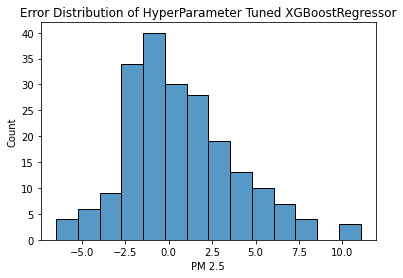

In [160]:
hyp_xgb_pred = hyp_xgb_random.predict(X_test)
sns.histplot(y_test-hyp_xgb_pred)
plt.title("Error Distribution of HyperParameter Tuned XGBoostRegressor")
plt.show()

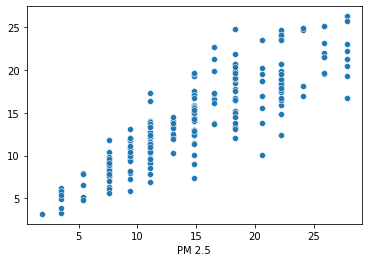

In [161]:
sns.scatterplot(x=y_test,y=hyp_xgb_pred)
plt.show()

**Loss Functions**

In [163]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,hyp_xgb_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,hyp_xgb_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,hyp_xgb_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.4707084840046614
Mean Squared Error: 10.494559501002362
Root Mean Squared Error: 3.239530753211391
-------------------------------------------------------------------


# Artificial Neural Networks [ANN]

In [167]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,LeakyReLU,ELU,PReLU

In [170]:
ann_model = Sequential()

## the input layer
ann_model.add(Dense(128, kernel_initializer='normal',input_dim=X_train.shape[1], activation='relu'))

## the hidden layer
ann_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
ann_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
ann_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

## the output layer
ann_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

## Compile the network :
ann_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
ann_model.summary()

## Fitting the ANN to the Training set
model_history=ann_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs = 100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
33/33 [==============================] - 0s 5ms/step - loss: 5.7199 - mean_absolute_error: 5.7199 - va

Epoch 45/100
33/33 [==============================] - 0s 2ms/step - loss: 2.6940 - mean_absolute_error: 2.6940 - val_loss: 2.2056 - val_mean_absolute_error: 2.2056
Epoch 46/100
33/33 [==============================] - 0s 2ms/step - loss: 2.5373 - mean_absolute_error: 2.5373 - val_loss: 2.2735 - val_mean_absolute_error: 2.2735
Epoch 47/100
33/33 [==============================] - 0s 3ms/step - loss: 2.6230 - mean_absolute_error: 2.6230 - val_loss: 2.4594 - val_mean_absolute_error: 2.4594
Epoch 48/100
33/33 [==============================] - 0s 3ms/step - loss: 2.5068 - mean_absolute_error: 2.5068 - val_loss: 2.4291 - val_mean_absolute_error: 2.4291
Epoch 49/100
33/33 [==============================] - 0s 3ms/step - loss: 2.4696 - mean_absolute_error: 2.4696 - val_loss: 2.1755 - val_mean_absolute_error: 2.1755
Epoch 50/100
33/33 [==============================] - 0s 3ms/step - loss: 2.5580 - mean_absolute_error: 2.5580 - val_loss: 2.1704 - val_mean_absolute_error: 2.1704
Epoch 51/100
33/

Epoch 95/100
33/33 [==============================] - 0s 3ms/step - loss: 2.3795 - mean_absolute_error: 2.3795 - val_loss: 3.1460 - val_mean_absolute_error: 3.1460
Epoch 96/100
33/33 [==============================] - 0s 3ms/step - loss: 2.6652 - mean_absolute_error: 2.6652 - val_loss: 2.2414 - val_mean_absolute_error: 2.2414
Epoch 97/100
33/33 [==============================] - 0s 4ms/step - loss: 2.7048 - mean_absolute_error: 2.7048 - val_loss: 2.8606 - val_mean_absolute_error: 2.8606
Epoch 98/100
33/33 [==============================] - 0s 3ms/step - loss: 2.5540 - mean_absolute_error: 2.5540 - val_loss: 2.2125 - val_mean_absolute_error: 2.2125
Epoch 99/100
33/33 [==============================] - 0s 3ms/step - loss: 2.5703 - mean_absolute_error: 2.5703 - val_loss: 2.1957 - val_mean_absolute_error: 2.1957
Epoch 100/100
33/33 [==============================] - 0s 3ms/step - loss: 2.5209 - mean_absolute_error: 2.5209 - val_loss: 2.6616 - val_mean_absolute_error: 2.6616


In [196]:
## y_test = y_test.values.reshape(-1,1)

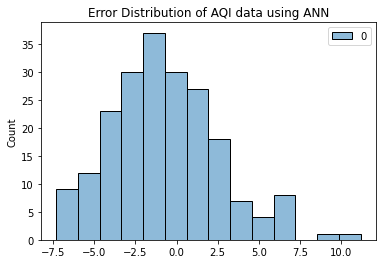

In [216]:
ann_pred=ann_model.predict(X_test)
sns.histplot(y_test.values.reshape(-1,1)-ann_pred)
plt.title("Error Distribution of AQI data using ANN")
plt.show()

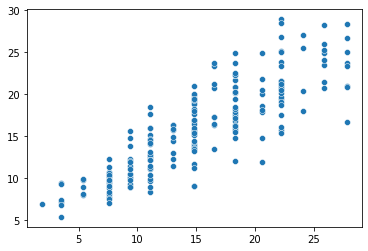

In [237]:
sns.scatterplot(x=y_test.reshape(-1),y=ann_pred.reshape(-1))
plt.show()

**Loss Functions**

In [242]:
print("-------------------------------------------------------------------")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,ann_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,ann_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,ann_pred)))
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Mean Absolute Error: 2.6886249136809557
Mean Squared Error: 11.234376783065105
Root Mean Squared Error: 3.3517721854364004
-------------------------------------------------------------------
